<img src="../logo_UTN.svg" align="right" width="150" /> 

# Teoría De Circuitos 2

# Trabajo Semanal Nº2
#### Federico Borello

### Consigna

Dado el circuito:

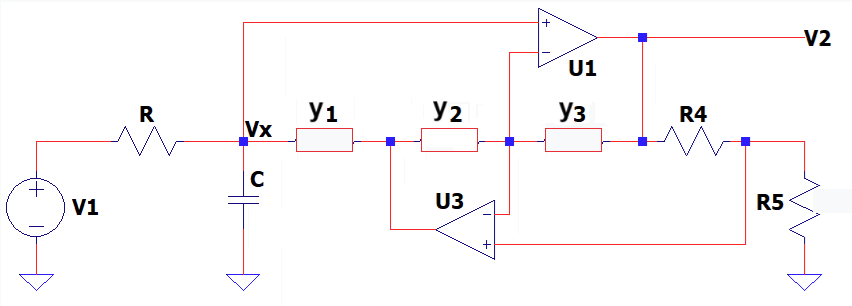

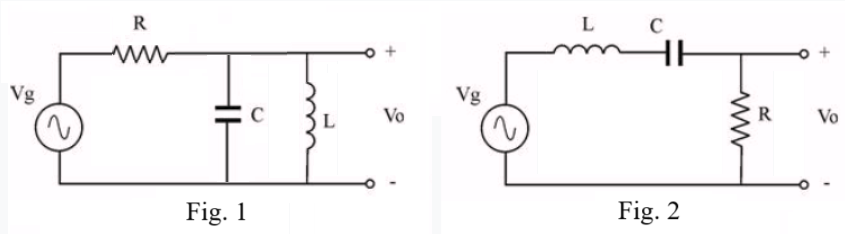


1. Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de R4, R5, Y1, Y2 e Y3 de tal manera que se comporte como un inductor de valor unitario. 
2. Obtener la función transferencia $\cfrac{V_2}{V_1}$. Desnormalizar convenientemente en frecuencia e impedancia para garantizar una f0 = 10kHz  y Q = 20 utilizando capacitores entre 1 nF y 100 nF: ¡los resistores no tienen restricciones!
3. Simular la función transferencia desnormalizada en Python. Se sugiere programar la función transferencia normalizada y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2.

Bonus:

- +1 💎 Obtener los valores de R4 y R5 para obtener un filtro pasabanda con una ganancia +20 dB de en el centro de la banda de paso, es decir, en $f0$.
- +1 💎 Evaluar la posibilidad de reemplazar el inductor L de la Fig. 2 por un GIC. Tenga presente que NO debe realizar ningún tipo de cuenta pero Si debe indicar si se presenta -o no- algún tipo de inconveniente o limitación.
- +2 💎  Graficar la respuesta de módulo en LTspice con el eje lineal en frecuencia. Halle numéricamente $BW = f2 - f1$  y verifique que $f0$ sea la media geométrica entre $f2$ y $f1$.


In [ ]:
from IPython.display import HTML

file = "./TS2_handwritten.pdf"
html = f"""
<div style="text-align:center;">
    <iframe src="{file}" width="900" height="600"></iframe>
</div>
"""
HTML(html)

In [ ]:
# SetUp - Import /utils module
import sys
import os

sys.path.append(os.path.abspath(".."))
import utils

# Import common packages
from IPython.display import display, Markdown
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defino las Variables del circuito
V1, Vn, V2, R1, R2, R3, C = sp.symbols("V1 Vn V2 R1 R2 R3 C", real=True)
s = sp.symbols("s")  # s es una variable compleja

# Defino las ecuaciones de los nodos
eq1 = sp.Eq((V1 - Vn) / R1, (Vn - V2) / R2)
eq2 = sp.Eq((V1 - Vn) * (s * C), Vn / R3)

# Despejo Vn de una ecuacion
Vn_sol = sp.solve(eq2, Vn)
# Uso Vn en la otra ecuacion
eq1_sol = eq1.subs(Vn, Vn_sol[0])

# Obtengo V2
V2_sol = sp.solve(eq1_sol, V2)[0]

H = ratio_V2_V1 = sp.simplify(V2_sol / V1)

H

# Caso de Estudio

### Simualación con LT Spice

<a href="./TS2.asc" download="TS2.asc">Descargar TS2.asc</a>

## Conclusiones
